In [23]:
import torch
torch.cuda.is_available()

True

In [1]:
from Data_train import epoch 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
import numpy as np

create_epoch = epoch.create_epoch

model = XGBRegressor(tree_method='hist')
# X, Y = create_epoch()




# with open("Data_train/Saved/arrayX.txt", "a") as arrayX:
#           np.savetxt(arrayX, X, delimiter=",", fmt='%.4f')

# with open("Data_train/Saved/arrayY.txt", "a") as arrayY:
#           np.savetxt(arrayY, Y, delimiter=",", fmt='%.4f')


/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [2]:
X = np.loadtxt("Data_train/Saved/arrayX_train_30_days_pred_7_days.txt", delimiter=",")
Y = np.loadtxt("Data_train/Saved/arrayY_train_30_days_pred_7_days.txt", delimiter=",")

### Code xử lí chuyển output thành 7 ngày

In [11]:
# temp = Y_torch.clone().detach()
# temp1 = torch.roll(temp, -1)
# temp2 = torch.roll(temp, -2)
# temp3 = torch.roll(temp, -3)
# temp4 = torch.roll(temp, -4)
# temp5 = torch.roll(temp, -5)
# temp6 = torch.roll(temp, -6)

# Y_temp = torch.column_stack((temp, temp1, temp2, temp3, temp4, temp5, temp6))

# len_sku = 903
# day_sku = Y_temp.shape[0]/len_sku
# day_pred = 7

# start = (int)(day_sku - day_pred)


# for i in range(1, len_sku + 1):
#           X_temp = torch.cat((X_temp[:start*i], X_temp[start*i + day_pred:]))
#           Y_temp = torch.cat((Y_temp[:start*i], Y_temp[start*i + day_pred:]))

# print(X_temp.shape)
# print(Y_temp.shape)


torch.Size([310632, 785])
torch.Size([310632, 7])


### Code lưu mảng đã xử lí vào file .txt

In [ ]:
# X_temp = X_temp.cpu().detach().numpy()
# Y_temp = Y_temp.cpu().detach().numpy()

# with open("Data_train/Saved/arrayX_temp.txt", "a") as arrayX:
#           np.savetxt(arrayX, X_temp, delimiter=",", fmt='%.4f')

# with open("Data_train/Saved/arrayY_temp.txt", "a") as arrayY:
#           np.savetxt(arrayY, Y_temp, delimiter=",", fmt='%.4f')

In [18]:
# Giữ lại một số sku để test
sku_test = 103
sku_train = round(X.shape[0]/330 - sku_test)

In [19]:
sku_train

800

In [20]:
# split data into train and test sets
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = X[:sku_train*330], X[sku_train*330:], Y[:sku_train*330], Y[sku_train*330:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(264000, 800)
(33990, 800)
(264000, 7)
(33990, 7)


In [26]:
# model.load_model('/home/it/Desktop/NTMINH/Report-data-analysis/Model/Data_train/Saved/model_history_daytime_cat_pred_one_day')

In [21]:
model.fit(X_train, y_train)
print(model)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [22]:
model.save_model('/home/it/Desktop/NTMINH/Report-data-analysis/Model/Data_train/Saved/model_history_daytime_cat_pred_7_days')


In [23]:
# make predictions for test data
y_pred = model.predict(X_test)

In [24]:
np.sqrt(np.square(np.subtract(y_test, y_pred))).sum()/y_test.shape[0]

9.707612409975082

In [25]:
y_pred_int = np.asarray(y_pred, dtype = np.int32)
y_pred_int[y_pred_int < 0] = 0

In [26]:
print('Số lượng lable > 0',len(y_test[y_test > 0]))
print('Số lượng lable == 0',len(y_test[y_test == 0]))

print('Số lượng pred > 0',len(y_pred_int[y_pred_int > 0]))
print('Số lượng pred == 0',len(y_pred_int[y_pred_int == 0]))
print('Số lượng pred == 0',len(y_pred_int[y_pred_int < 0]))

Số lượng lable > 0 100960
Số lượng lable == 0 136970
Số lượng pred > 0 103607
Số lượng pred == 0 134323
Số lượng pred == 0 0


In [27]:
total = len(y_test[y_test == 0])
acc = ((y_test == 0) & (y_pred_int == 0)).sum()
acc/total

0.769204935387311

In [28]:
condition = np.where(y_test != 0)
np.sqrt(np.square(np.subtract(y_test[condition], y_pred[condition]))).sum()/y_test.shape[0]

6.26837001757713

In [29]:
print(np.max(np.subtract(y_test[condition], y_pred[condition])))
print(np.min(np.subtract(y_test[condition], y_pred[condition])))

321.126748085022
-177.87548828125


<AxesSubplot:>

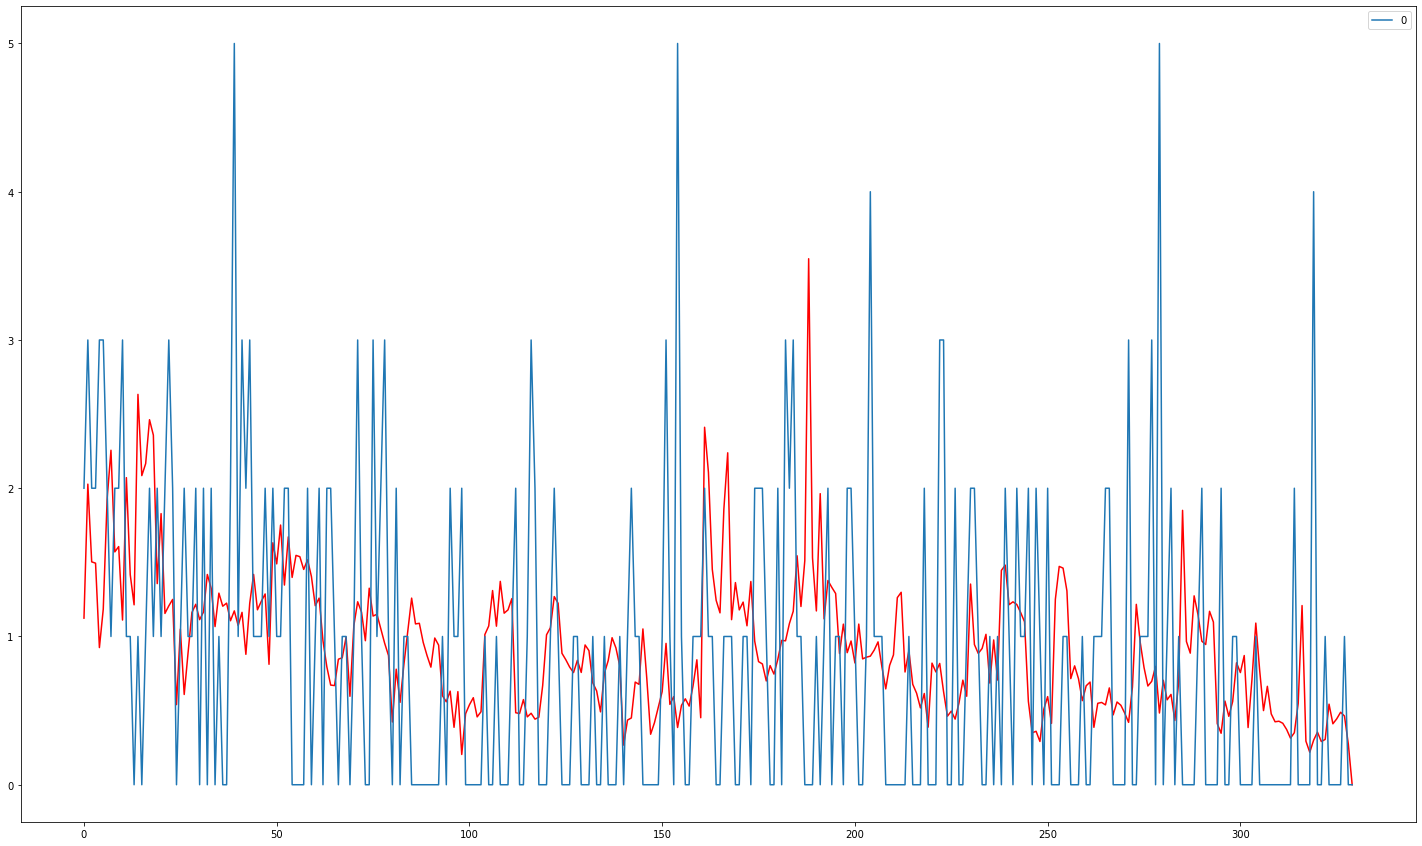

In [56]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'test':  np.random.rand(5)})
df2 = pd.DataFrame({'test':  np.random.rand(5)})

num = round(np.random.rand()*100)

temp = X_test[330*num:330 + 330*num].copy()
result = y_test[330*num:330 + 330*num, 6:7].copy()
temp.shape

fig, ax = plt.subplots(figsize = (25, 15))

array = np.zeros(shape = (330, 330))
array[:] = np.nan

for i in range(0, 330 - 7, 7):
          predict = model.predict([temp[i]])

          array[i, i:i+7] = predict

array = np.nan_to_num(array)

array = np.sum(array, axis = 0)
sns.lineplot(data = array, ax = ax, color = 'red')

# for row in range(array.shape[0]):
#           sns.lineplot(data = array[row], ax = ax)

sns.lineplot(data = result, ax = ax)



In [48]:
for test, pred in zip(y_test, y_pred):
          print('test:', test)
          print('pred:', np.round(pred))

test: [0. 0. 0. 0. 0. 0. 0.]
pred: [ 0. -0. -0. -0.  0. -0.  0.]
test: [6. 4. 3. 0. 4. 4. 0.]
pred: [3. 3. 3. 3. 3. 3. 3.]
test: [0. 1. 3. 0. 0. 0. 0.]
pred: [2. 2. 2. 1. 1. 2. 2.]
test: [0. 1. 3. 0. 3. 0. 1.]
pred: [1. 1. 1. 1. 3. 1. 1.]
test: [0. 1. 0. 0. 0. 3. 4.]
pred: [1. 2. 1. 2. 1. 1. 2.]
test: [2. 1. 2. 1. 0. 0. 0.]
pred: [1. 2. 1. 2. 2. 1. 1.]
test: [0. 0. 0. 0. 0. 0. 0.]
pred: [0. 0. 0. 0. 0. 0. 0.]
test: [4. 2. 1. 1. 1. 1. 4.]
pred: [2. 2. 2. 2. 2. 2. 2.]
test: [15.  3.  5.  3.  7.  7.  2.]
pred: [10.  1.  4.  9.  0.  6.  5.]
test: [0. 0. 0. 0. 0. 0. 0.]
pred: [0. 0. 0. 1. 1. 1. 2.]
test: [1. 4. 1. 0. 1. 1. 0.]
pred: [1. 1. 0. 1. 1. 1. 1.]
test: [0. 0. 0. 0. 1. 1. 2.]
pred: [1. 1. 1. 1. 1. 1. 1.]
test: [0. 0. 0. 0. 0. 0. 0.]
pred: [0. 0. 1. 1. 1. 1. 1.]
test: [0. 3. 3. 2. 2. 0. 1.]
pred: [1. 1. 2. 1. 2. 2. 1.]
test: [3. 5. 1. 1. 1. 1. 4.]
pred: [2. 1. 2. 2. 2. 4. 2.]
test: [0. 0. 0. 0. 0. 0. 0.]
pred: [ 0. -0. -0. -0. -0. -1. -0.]
test: [ 0.  3.  0.  0.  0.  1. 18.]
pred: [4

In [16]:
temp = np.zeros(shape = X_test.shape)

temp[:, :17] = X_test[:, :17]
pred = model.predict(temp)
pred_int = np.asarray(pred, dtype = np.int32)

total = len(y_test[y_test == 0])
acc = ((y_test == 0) & (pred_int == 0)).sum()
acc/total

0.8276844840593478

In [17]:
condition = np.where(y_test != 0)
np.sqrt(np.square(np.subtract(y_test[condition], pred_int[condition]))).sum()/y_test.shape[0]

0.8561940969538262

<AxesSubplot:>

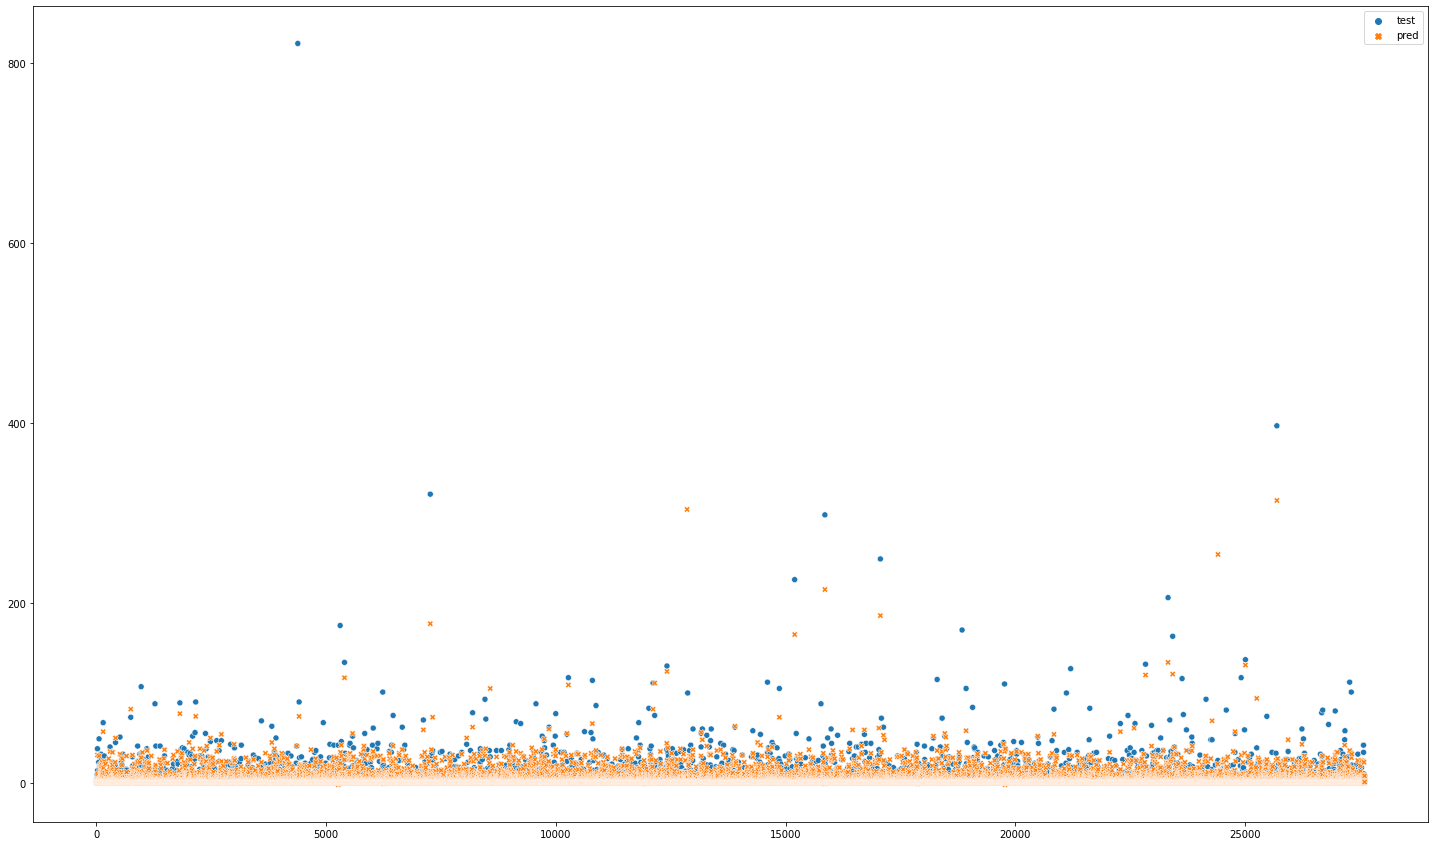

In [18]:
condition = np.where(y_test != 0)

df = pd.DataFrame({'test':  y_test[condition],
                    'pred': pred_int[condition]})

fig, ax = plt.subplots(figsize = (25, 15))
sns.scatterplot(data = df, ax = ax)

In [19]:
temp = np.zeros(shape = X_test.shape)

temp[:, 17:] = X_test[:, 17:]
pred = model.predict(temp)
pred_int = np.asarray(pred, dtype = np.int32)

total = len(y_test[y_test == 0])
acc = ((y_test == 0) & (pred_int == 0)).sum()
acc/total

1.0

In [20]:
condition = np.where(y_test != 0)
np.sqrt(np.square(np.subtract(y_test[condition], pred_int[condition]))).sum()/y_test.shape[0]

1.6655203420043856

<AxesSubplot:>

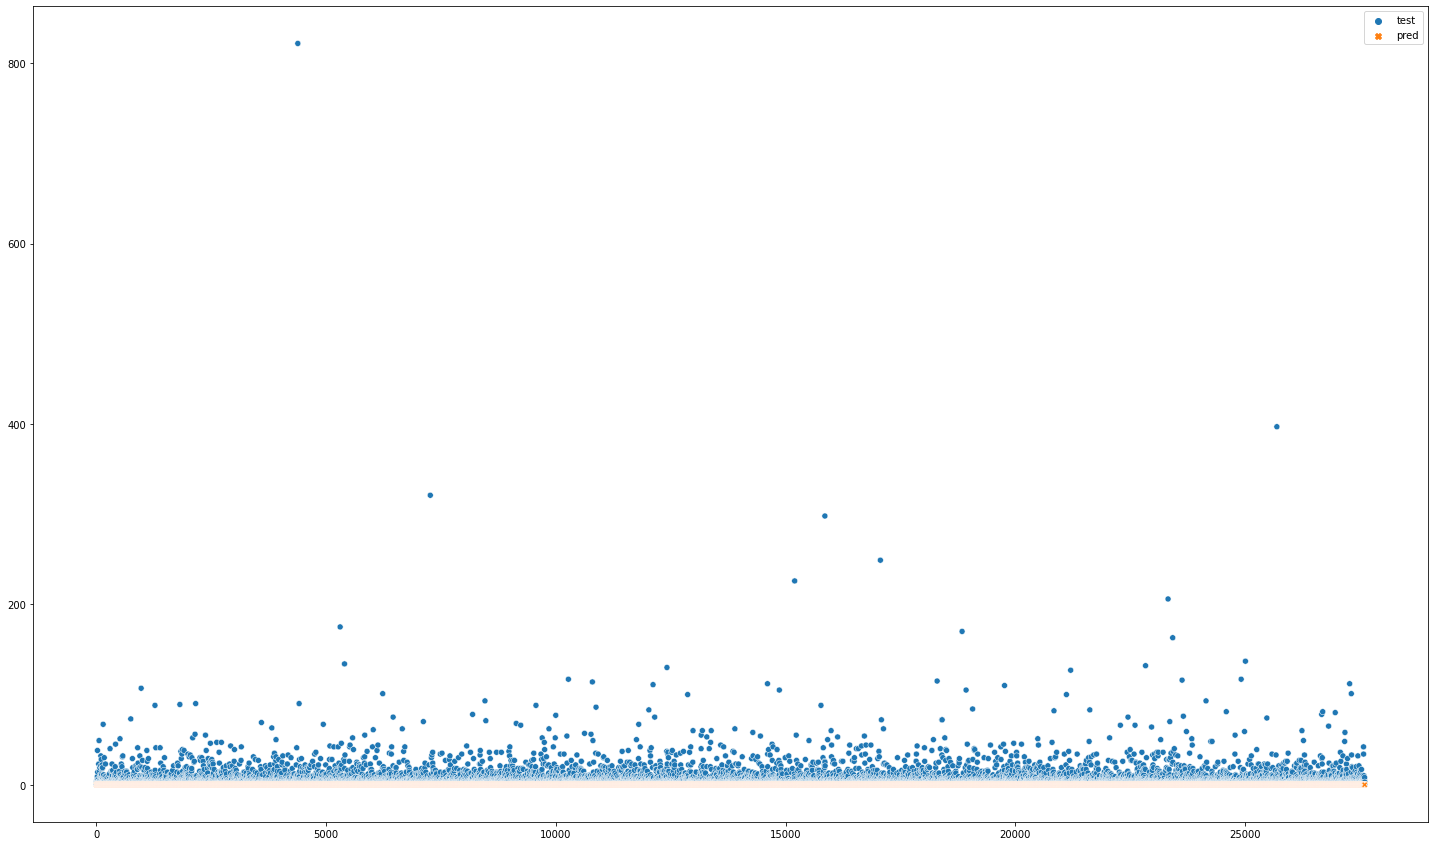

In [21]:
condition = np.where(y_test != 0)

df = pd.DataFrame({'test':  y_test[condition],
                    'pred': pred_int[condition]})

fig, ax = plt.subplots(figsize = (25, 15))
sns.scatterplot(data = df, ax = ax)

In [22]:
print('history của 15 ngày', X_test[0, : 15])
print('Ngày', X_test[0,15 : 16])
print('Tháng', X_test[0,16 : 17])
print(y_test[0])

temp = np.zeros(shape = (1, 785))
temp[0, :17] = [0,0,0,0,1,2,0,0,4,0,0,1,0,3,1,3,12]

pred = model.predict(temp)
pred

history của 15 ngày [0. 0. 0. 0. 1. 2. 0. 0. 4. 0. 0. 1. 0. 3. 1.]
Ngày [3.]
Tháng [12.]
1.0


array([1.0308657], dtype=float32)

In [24]:
pred_int[pred_int != 0]

array([], dtype=int32)

In [23]:
for test, pred in zip(y_test, pred_int):
          print('test:', test)
          print('pred:', np.round(pred))

test: 1.0
pred: 0
test: 4.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 1.0
pred: 0
test: 3.0
pred: 0
test: 3.0
pred: 0
test: 0.0
pred: 0
test: 1.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 2.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 1.0
pred: 0
test: 2.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 1.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 3.0
pred: 0
test: 5.0
pred: 0
test: 2.0
pred: 0
test: 0.0
pred: 0
test: 4.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 3.0
pred: 0
test: 1.0
pred: 0
test: 0.0
pred: 0
test: 1.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 9.0
pred: 0
test: 2.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 1.0
pred: 0
test: 0.0
pred: 0
test: 1.0
pred: 0
test: 0.0
pred: 0
test: 0.0
pred: 0
test: 38.0
pred: 0
test: 0.0
pred: 0
test: 3.0
pred: 0
test: 3.0